## Foundations: Split Grampian data into train and validation Set

In this section, we will split the data into train, validation, and test set in preparation for fitting a basic model in the next section.

### Read in Data

In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split

grampian = pd.read_csv('training-data.csv', index_col=0)
grampian.head()

,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,...,AFFX-RandomGC20_at,AFFX-RandomGC21_at,AFFX-RandomGC22_at,AFFX-RandomGC23_at,AFFX-RandomGC24_at,AFFX-RandomGC25_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,response
SC00552A,6.784835,7.936344,7.371196,8.181835,7.353770,7.134614,6.966309,9.332677,8.366234,10.614328,...,6.334792,6.678221,7.665354,8.204382,8.430031,9.565390,12.416360,9.353478,9.655392,responder
SC00553A,7.117193,7.611494,7.189978,8.319763,6.289151,7.842616,6.850054,9.080991,8.535750,9.686599,...,6.297144,6.596092,7.492539,7.763283,7.919315,9.165384,13.309335,10.328616,11.898839,responder
SC00554A,7.293805,7.826206,7.776294,8.509132,6.213208,8.281080,6.840249,9.130115,8.690585,9.924230,...,6.358395,6.692786,7.604959,8.003054,8.167462,9.340903,13.217975,10.338412,11.792806,responder
SC00557A,7.105180,7.389507,8.422889,8.471625,6.659864,8.179317,6.951274,9.590852,9.018755,10.220229,...,6.443380,6.865441,7.797696,8.219196,8.556368,10.092938,13.572676,12.070184,12.633410,responder
SC00558A,7.281019,7.289066,6.471732,7.294180,4.377470,8.784466,6.144495,8.908948,8.964797,9.240668,...,6.681889,7.043237,7.903389,8.307560,8.427168,9.650012,12.394826,9.140385,10.599570,responder


## Foundations: Load Aristotle as test set

In this section, we will split the data into train, validation, and test set in preparation for fitting a basic model in the next section.

### Read in Data

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split

aristotle = pd.read_csv('testing-data.csv', index_col=0)
aristotle.head()

,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,...,AFFX-RandomGC20_at,AFFX-RandomGC21_at,AFFX-RandomGC22_at,AFFX-RandomGC23_at,AFFX-RandomGC24_at,AFFX-RandomGC25_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,response
SC02633A,6.732207,7.825840,7.101290,8.054546,7.087395,7.189715,6.772935,9.588128,8.678079,10.263325,...,5.516186,5.826070,6.703772,6.939992,7.112450,8.475505,9.759877,6.105214,6.364190,nonresponder
SC02652A,6.995503,7.621030,7.607439,8.490333,6.950344,8.214480,6.466040,9.571546,9.283031,10.801179,...,6.323778,6.674712,7.638941,8.043560,8.312677,9.685408,12.732607,10.194748,11.266865,nonresponder
SC02654A,7.210064,7.743815,8.280260,9.051701,6.392461,8.447026,6.566332,9.867437,8.799990,10.066190,...,6.360149,6.680899,7.569930,7.924286,8.109158,9.722512,13.172488,10.385931,11.590578,responder
SC02661A,7.101194,7.355288,6.838709,7.427368,6.126517,8.025706,6.574185,9.269426,8.382769,8.949193,...,6.205688,6.509471,7.373502,7.651788,7.880620,9.375663,13.829833,11.589315,12.696109,nonresponder
SC02663A,7.173431,8.518607,7.473707,8.181842,6.355731,8.249371,6.940157,9.939661,8.982059,10.521452,...,6.406907,6.782722,7.725195,8.115358,8.394742,9.792460,12.901269,9.620797,11.478584,responder


### Split into train, validation, and test set

![Split Data](../../img/split_data.png)

In [34]:
features = grampian.drop('response', axis=1)
labels = grampian['response']

#features = features.drop('responsenstage', axis=1)
features.head()
response_num = {'nonresponder': 0, 'responder': 1}
labels = grampian['response'].map(response_num)
labels.head()

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.02, random_state=42)
X_train.shape

X_test = aristotle.drop('response', axis=1)
y_test = aristotle['response']
X_test.shape

#X_test = X_test.drop('responsenstage', axis=1)
y_test = aristotle['response'].map(response_num)
X_test.head()
y_test.head()

SC02633A    0
SC02652A    0
SC02654A    1
SC02661A    0
SC02663A    1
Name: response, dtype: int64

In [35]:
for dataset in [y_train, y_val]:
    print(round(len(dataset) / len(labels), 2))

0.97
0.03


### Write out all data

In [36]:
X_train.to_csv('train_features.csv', index=False)
X_val.to_csv('val_features.csv', index=False)
X_test.to_csv('test_features.csv', index=False)

y_train.to_csv('train_labels.csv', index=False)
y_val.to_csv('val_labels.csv', index=False)
y_test.to_csv('test_labels.csv', index=False)

## Logistic Regression Model

### Load model

In [38]:
from sklearn.linear_model import LogisticRegression

LogisticRegression()

#dir(LogisticRegression)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [19]:
import joblib
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import warnings
import random
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=DeprecationWarning)

tr_features = pd.read_csv('train_features.csv')
tr_labels = pd.read_csv('train_labels.csv')
tr_features.head()
#tr_features.shape
#tr_labels.shape

,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,...,AFFX-RandomGC19_at,AFFX-RandomGC20_at,AFFX-RandomGC21_at,AFFX-RandomGC22_at,AFFX-RandomGC23_at,AFFX-RandomGC24_at,AFFX-RandomGC25_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at
0,7.093691,6.916419,6.986703,7.968183,7.306296,8.253870,6.955889,9.900450,8.528602,10.351529,...,5.362341,5.900119,6.198667,7.143468,7.418844,7.633555,8.863510,13.502473,10.624616,12.131222
1,6.715336,7.354861,6.843139,7.628747,6.857799,8.022336,6.710937,9.647615,8.539069,10.207311,...,5.565536,6.070089,6.472336,7.311983,7.749428,7.923459,9.114483,12.628817,8.340056,10.237121
2,7.122286,6.773438,6.165190,8.098796,5.534260,7.739892,6.527333,9.437790,8.536817,9.588951,...,6.069218,6.704322,7.066462,8.112168,8.499385,8.861873,10.064519,13.154293,9.898900,11.437328
3,6.937645,7.910833,7.627934,8.364590,6.890327,8.038605,6.520004,9.558196,8.751250,10.509951,...,5.582684,6.108854,6.426705,7.292345,7.612316,7.833573,9.023539,13.420370,10.378164,11.965499
4,6.765802,7.786715,7.711630,8.407464,8.023906,8.755785,7.011805,9.383447,8.706647,10.659260,...,5.247923,5.799485,6.119877,7.018079,7.376125,7.523564,8.837566,13.364201,10.683741,12.062663


In [23]:
def print_results(results):
    print('BEST PARAMS: {}\n'.format(results.best_params_))

    means = results.cv_results_['mean_test_score']
    stds = results.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, results.cv_results_['params']):
        print('{} (+/-{}) for {}'.format(round(mean, 3), round(std * 2, 3), params))

In [41]:
lr = LogisticRegression(max_iter=2000)
parameters = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

cv = GridSearchCV(lr, parameters, cv=10, n_jobs=-1)
random.seed(47)
%timeit cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

4min 39s ± 1.43 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
BEST PARAMS: {'C': 1000}

0.91 (+/-0.184) for {'C': 0.001}
0.91 (+/-0.153) for {'C': 0.01}
0.91 (+/-0.153) for {'C': 0.1}
0.91 (+/-0.153) for {'C': 1}
0.91 (+/-0.153) for {'C': 10}
0.91 (+/-0.153) for {'C': 100}
0.917 (+/-0.13) for {'C': 1000}


In [42]:
cv.best_estimator_

LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=2000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [43]:
joblib.dump(cv.best_estimator_, 'LR_model.pkl')

['LR_model.pkl']

## Elastic Net Model

### Load model

In [13]:
from sklearn.linear_model import SGDClassifier

SGDClassifier()

#dir(LogisticRegression)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
import random
import numpy as np
10**np.arange(-3,3, 0.06)

array([1.00000000e-03, 1.14815362e-03, 1.31825674e-03, 1.51356125e-03,
       1.73780083e-03, 1.99526231e-03, 2.29086765e-03, 2.63026799e-03,
       3.01995172e-03, 3.46736850e-03, 3.98107171e-03, 4.57088190e-03,
       5.24807460e-03, 6.02559586e-03, 6.91830971e-03, 7.94328235e-03,
       9.12010839e-03, 1.04712855e-02, 1.20226443e-02, 1.38038426e-02,
       1.58489319e-02, 1.81970086e-02, 2.08929613e-02, 2.39883292e-02,
       2.75422870e-02, 3.16227766e-02, 3.63078055e-02, 4.16869383e-02,
       4.78630092e-02, 5.49540874e-02, 6.30957344e-02, 7.24435960e-02,
       8.31763771e-02, 9.54992586e-02, 1.09647820e-01, 1.25892541e-01,
       1.44543977e-01, 1.65958691e-01, 1.90546072e-01, 2.18776162e-01,
       2.51188643e-01, 2.88403150e-01, 3.31131121e-01, 3.80189396e-01,
       4.36515832e-01, 5.01187234e-01, 5.75439937e-01, 6.60693448e-01,
       7.58577575e-01, 8.70963590e-01, 1.00000000e+00, 1.14815362e+00,
       1.31825674e+00, 1.51356125e+00, 1.73780083e+00, 1.99526231e+00,
      

In [ ]:
en = SGDClassifier(max_iter=10000, penalty='elasticnet', loss='log')
random.seed(47)
parameters = {
    #'alpha': [0.0001, 0.001, 0.01, 0.1, 0.3, 0.5, 0.7, 1],
    'alpha': 10**np.arange(-3,3, 0.06),
    'l1_ratio' : np.arange(0,1,0.05)
}

cv = GridSearchCV(en, parameters, cv=5, n_jobs=-1)
random.seed(47)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

In [ ]:
cv.best_estimator_

In [38]:
joblib.dump(cv.best_estimator_, 'EN_model.pkl')

['EN_model.pkl']

## Support Vector Machines

### Load model

In [ ]:
from sklearn.svm import SVC

SVC()

dir(SVC)

In [45]:
svc = SVC(probability=True)
parameters = {
    'kernel': ['linear', 'rbf'],
    'C': [0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 1, 1.25, 1.5, 1.75, 2,5,10,20,50,100]
}

cv = GridSearchCV(svc, parameters, cv=5, n_jobs=-1)
random.seed(47)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'C': 0.01, 'kernel': 'linear'}

0.897 (+/-0.086) for {'C': 0.01, 'kernel': 'linear'}
0.568 (+/-0.032) for {'C': 0.01, 'kernel': 'rbf'}
0.897 (+/-0.086) for {'C': 0.05, 'kernel': 'linear'}
0.568 (+/-0.032) for {'C': 0.05, 'kernel': 'rbf'}
0.897 (+/-0.086) for {'C': 0.1, 'kernel': 'linear'}
0.568 (+/-0.032) for {'C': 0.1, 'kernel': 'rbf'}
0.897 (+/-0.086) for {'C': 0.25, 'kernel': 'linear'}
0.568 (+/-0.032) for {'C': 0.25, 'kernel': 'rbf'}
0.897 (+/-0.086) for {'C': 0.5, 'kernel': 'linear'}
0.574 (+/-0.026) for {'C': 0.5, 'kernel': 'rbf'}
0.897 (+/-0.086) for {'C': 0.75, 'kernel': 'linear'}
0.632 (+/-0.052) for {'C': 0.75, 'kernel': 'rbf'}
0.897 (+/-0.086) for {'C': 1, 'kernel': 'linear'}
0.716 (+/-0.103) for {'C': 1, 'kernel': 'rbf'}
0.897 (+/-0.086) for {'C': 1.25, 'kernel': 'linear'}
0.735 (+/-0.132) for {'C': 1.25, 'kernel': 'rbf'}
0.897 (+/-0.086) for {'C': 1.5, 'kernel': 'linear'}
0.755 (+/-0.139) for {'C': 1.5, 'kernel': 'rbf'}
0.897 (+/-0.086) for {'C': 1.75, 'kerne

In [46]:
cv.best_estimator_

SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [47]:
joblib.dump(cv.best_estimator_, 'SVM_model.pkl')

['SVM_model.pkl']

## Multilayer Perceptron Model

### Load model

In [ ]:
from sklearn.neural_network import MLPRegressor, MLPClassifier

print(MLPRegressor())
print(MLPClassifier())

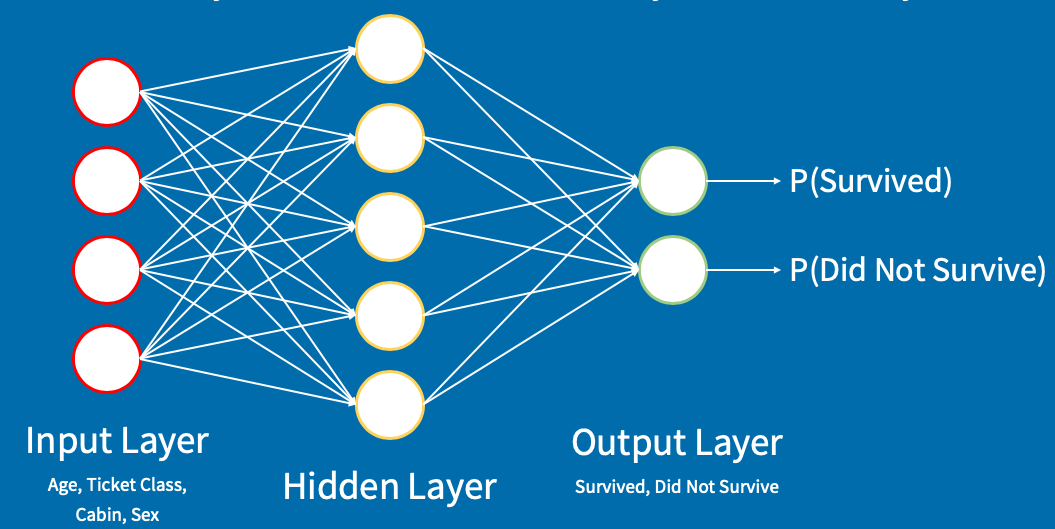

In [ ]:
mlp = MLPClassifier(max_iter=5000)
parameters = {
    'hidden_layer_sizes': [(10,), (50,), (100,)],
    'activation': ['relu', 'tanh', 'logistic'],
    'learning_rate': ['constant', 'invscaling', 'adaptive']
}

cv = GridSearchCV(mlp, parameters, cv=5, n_jobs=-1)
random.seed(47)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

In [ ]:
cv.best_estimator_

In [ ]:
joblib.dump(cv.best_estimator_, 'MLP_model.pkl')

## Random Forest

### Load model

In [17]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

print(RandomForestClassifier())
print(RandomForestRegressor())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      rand

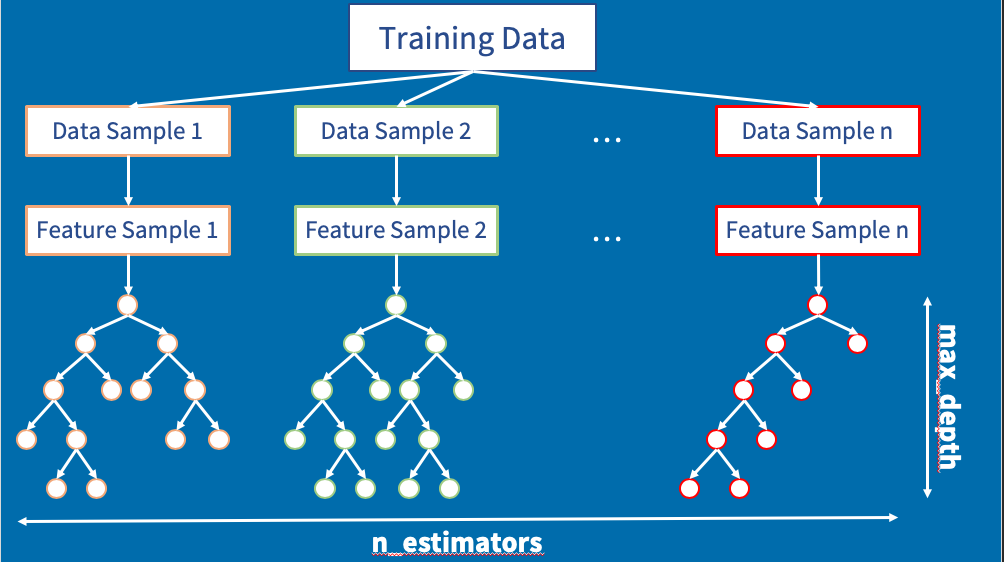

In [24]:
rf = RandomForestClassifier()
parameters = {
    'n_estimators': [5, 50, 250],
    'max_depth': [2, 4, 8, 16, 32, None]
}

cv = GridSearchCV(rf, parameters, cv=5, n_jobs=-1)
random.seed(47)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'max_depth': 8, 'n_estimators': 250}

0.774 (+/-0.058) for {'max_depth': 2, 'n_estimators': 5}
0.819 (+/-0.066) for {'max_depth': 2, 'n_estimators': 50}
0.858 (+/-0.12) for {'max_depth': 2, 'n_estimators': 250}
0.858 (+/-0.032) for {'max_depth': 4, 'n_estimators': 5}
0.89 (+/-0.052) for {'max_depth': 4, 'n_estimators': 50}
0.865 (+/-0.095) for {'max_depth': 4, 'n_estimators': 250}
0.832 (+/-0.075) for {'max_depth': 8, 'n_estimators': 5}
0.865 (+/-0.048) for {'max_depth': 8, 'n_estimators': 50}
0.903 (+/-0.122) for {'max_depth': 8, 'n_estimators': 250}
0.787 (+/-0.12) for {'max_depth': 16, 'n_estimators': 5}
0.897 (+/-0.063) for {'max_depth': 16, 'n_estimators': 50}
0.897 (+/-0.086) for {'max_depth': 16, 'n_estimators': 250}
0.826 (+/-0.066) for {'max_depth': 32, 'n_estimators': 5}
0.865 (+/-0.075) for {'max_depth': 32, 'n_estimators': 50}
0.884 (+/-0.105) for {'max_depth': 32, 'n_estimators': 250}
0.819 (+/-0.097) for {'max_depth': None, 'n_estimators': 5}
0.884 (+/-0.088

In [27]:
cv.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=8, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=250,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [28]:
joblib.dump(cv.best_estimator_, 'RF_model.pkl')

['RF_model.pkl']

## Gradient Boosting Algorithm

### Load model

In [33]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

print(GradientBoostingClassifier())
print(GradientBoostingRegressor())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
GradientBoostingRegressor(alpha=0.9, ccp_alpha=0.0, criterion='friedman_mse',
                          init=None, learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
 

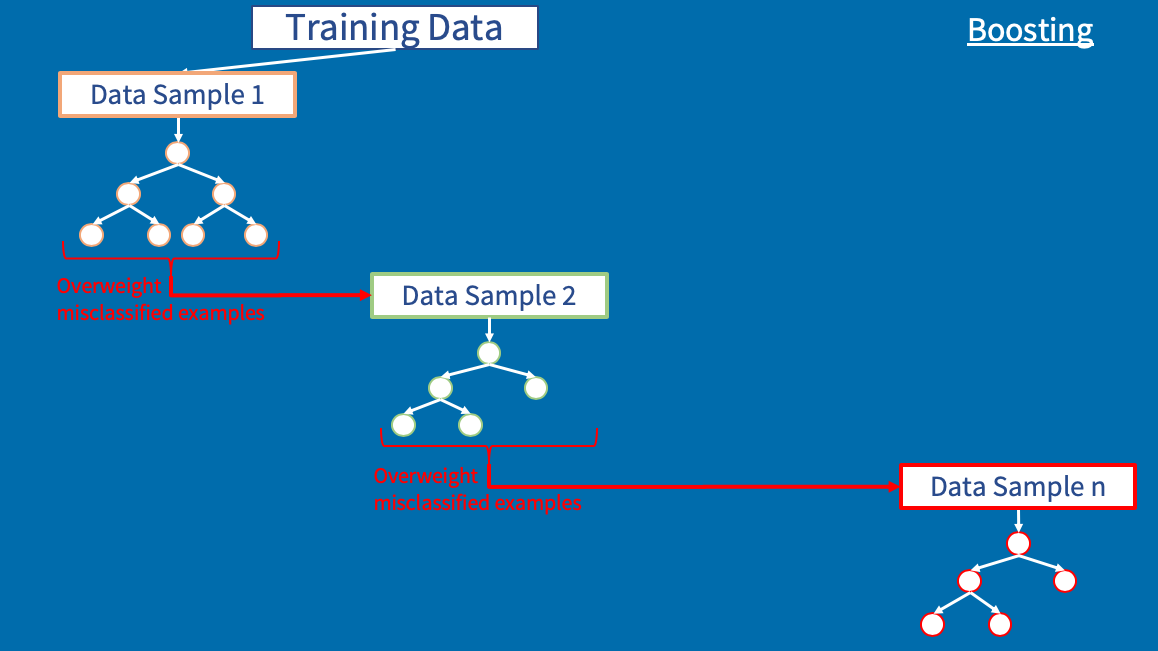

In [34]:
gb = GradientBoostingClassifier()
parameters = {
    'n_estimators': [5, 50, 250, 500],
    'max_depth': [1, 3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 1, 10, 100]
}

cv = GridSearchCV(gb, parameters, cv=5, n_jobs=-1)
random.seed(47)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 500}

0.568 (+/-0.032) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 5}
0.761 (+/-0.077) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 50}
0.845 (+/-0.118) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 250}
0.884 (+/-0.105) for {'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 500}
0.568 (+/-0.032) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 5}
0.871 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 50}
0.858 (+/-0.112) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 250}
0.865 (+/-0.111) for {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 500}
0.568 (+/-0.032) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 5}
0.871 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 50}
0.871 (+/-0.115) for {'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 250}
0.865 (+/-0.111) for {'learning_r

In [35]:
cv.best_estimator_

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=1,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=500,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [36]:
joblib.dump(cv.best_estimator_, 'GB_model.pkl')

['GB_model.pkl']

## KNN Model

### Load model

In [29]:
from sklearn.neighbors import KNeighborsClassifier

print(KNeighborsClassifier())

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [30]:
knn = KNeighborsClassifier()
parameters = {
    'n_neighbors' : range(1, 40),
    'weights' : ['uniform', 'distance'],
    'n_jobs' : [-1]
}

cv = GridSearchCV(knn, parameters, cv=10, n_jobs=-1)
random.seed(47)
cv.fit(tr_features, tr_labels.values.ravel())

print_results(cv)

BEST PARAMS: {'n_jobs': -1, 'n_neighbors': 38, 'weights': 'distance'}

0.819 (+/-0.153) for {'n_jobs': -1, 'n_neighbors': 1, 'weights': 'uniform'}
0.819 (+/-0.153) for {'n_jobs': -1, 'n_neighbors': 1, 'weights': 'distance'}
0.736 (+/-0.164) for {'n_jobs': -1, 'n_neighbors': 2, 'weights': 'uniform'}
0.819 (+/-0.153) for {'n_jobs': -1, 'n_neighbors': 2, 'weights': 'distance'}
0.665 (+/-0.189) for {'n_jobs': -1, 'n_neighbors': 3, 'weights': 'uniform'}
0.735 (+/-0.179) for {'n_jobs': -1, 'n_neighbors': 3, 'weights': 'distance'}
0.769 (+/-0.156) for {'n_jobs': -1, 'n_neighbors': 4, 'weights': 'uniform'}
0.768 (+/-0.141) for {'n_jobs': -1, 'n_neighbors': 4, 'weights': 'distance'}
0.742 (+/-0.123) for {'n_jobs': -1, 'n_neighbors': 5, 'weights': 'uniform'}
0.774 (+/-0.132) for {'n_jobs': -1, 'n_neighbors': 5, 'weights': 'distance'}
0.736 (+/-0.172) for {'n_jobs': -1, 'n_neighbors': 6, 'weights': 'uniform'}
0.76 (+/-0.181) for {'n_jobs': -1, 'n_neighbors': 6, 'weights': 'distance'}
0.715 (+/-0.

In [31]:
cv.best_estimator_

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=-1, n_neighbors=38, p=2,
                     weights='distance')

In [32]:
joblib.dump(cv.best_estimator_, 'KNN_model.pkl')

['KNN_model.pkl']

### Load model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

print(GradientBoostingClassifier())
print(GradientBoostingRegressor())

## Validation

### Read data

In [37]:
import joblib
import pandas as pd
from sklearn.metrics import accuracy_score, precision_score, recall_score
from time import time

val_features = pd.read_csv('val_features.csv')
val_labels = pd.read_csv('val_labels.csv')

te_features = pd.read_csv('test_features.csv')
te_labels = pd.read_csv('test_labels.csv')

In [45]:
models = {}

for mdl in ['LR', 'SVM', 'RF', 'GB', 'EN', 'KNN', 'MLP']:
    models[mdl] = joblib.load('{}_model.pkl'.format(mdl))

In [46]:
models

{'LR': LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=2000,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False),
 'SVM': SVC(C=0.01, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
     max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
     verbose=False),
 'RF': RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=8, max_features='auto',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_

In [47]:
def evaluate_model(name, model, features, labels):
    start = time()
    pred = model.predict(features)
    end = time()
    accuracy = round(accuracy_score(labels, pred), 3)
    precision = round(precision_score(labels, pred), 3)
    recall = round(recall_score(labels, pred), 3)
    print('{} -- Accuracy: {} / Precision: {} / Recall: {} / Latency: {}ms'.format(name,
                                                                                   accuracy,
                                                                                   precision,
                                                                                   recall,
                                                                                   round((end - start)*1000, 1)))

In [48]:
for name, mdl in models.items():
    evaluate_model(name, mdl, val_features, val_labels)

LR -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 56.8ms
SVM -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 67.5ms
RF -- Accuracy: 0.75 / Precision: 0.667 / Recall: 1.0 / Latency: 48.4ms
GB -- Accuracy: 1.0 / Precision: 1.0 / Recall: 1.0 / Latency: 31.7ms


ValueError: X has 63993 features per sample; expecting 167

In [49]:
for name, mdl in models.items():
    evaluate_model(name, mdl, te_features, te_labels)

LR -- Accuracy: 0.728 / Precision: 0.364 / Recall: 0.48 / Latency: 61.7ms
SVM -- Accuracy: 0.736 / Precision: 0.375 / Recall: 0.48 / Latency: 1146.8ms
RF -- Accuracy: 0.696 / Precision: 0.303 / Recall: 0.4 / Latency: 62.9ms
GB -- Accuracy: 0.736 / Precision: 0.367 / Recall: 0.44 / Latency: 82.4ms


ValueError: X has 63993 features per sample; expecting 167

In [66]:
evaluate_model('Random Forest', models['RF'], te_features, te_labels)

Random Forest -- Accuracy: 0.72 / Precision: 0.344 / Recall: 0.44 / Latency: 34.9ms


In [43]:
y_pred = models['SVM'].predict(te_features)

In [44]:
from sklearn.metrics import confusion_matrix
confusion_matrix(te_labels, y_pred)

array([[80, 20],
       [13, 12]])

In [9]:
from sklearn.metrics import roc_curve
roc_curve(te_labels, y_pred)

(array([0. , 0.2, 1. ]), array([0.  , 0.48, 1.  ]), array([2, 1, 0]))

In [10]:
from sklearn.metrics import roc_auc_score
# calculate AUC
auc = roc_auc_score(te_labels, y_pred)
print('AUC: %.3f' % auc)

AUC: 0.640


No Skill: ROC AUC=0.500
Model: ROC AUC=0.729


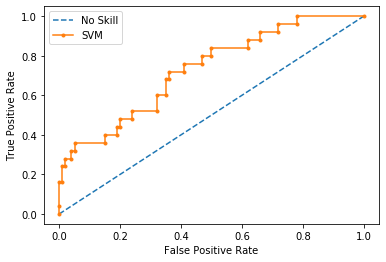

In [11]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(te_labels))]
ns_probs
lr_probs = models['SVM'].predict_proba(te_features)
lr_probs
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs
# calculate scores
ns_auc = roc_auc_score(te_labels, ns_probs)
lr_auc = roc_auc_score(te_labels, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Model: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(te_labels, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(te_labels, lr_probs)
ns_fpr
lr_fpr
# plot the roc curve for the model
from matplotlib import pyplot 
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='SVM')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

SVM: f1=0.421 auc=0.504


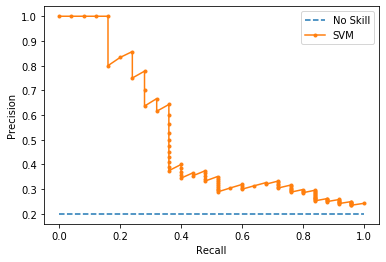

In [12]:
# Predict Probabilities
lr_probs = models['SVM'].predict_proba(te_features)
lr_probs
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]
lr_probs
# predict class values
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
yhat = models['SVM'].predict(te_features)
lr_precision, lr_recall, _ = precision_recall_curve(te_labels, lr_probs)
lr_f1, lr_auc = f1_score(te_labels, yhat), auc(lr_recall, lr_precision)
# summarize scores
print('SVM: f1=%.3f auc=%.3f' % (lr_f1, lr_auc))
# plot the precision-recall curves
#no_skill = len(te_labels[te_labels==1]) / len(te_labels)
no_skill = (te_labels[te_labels==1].count()) / (te_labels.count())
pyplot.plot([0, 1], [no_skill, no_skill], linestyle='--', label='No Skill')
pyplot.plot(lr_recall, lr_precision, marker='.', label='SVM')
# axis labels
pyplot.xlabel('Recall')
pyplot.ylabel('Precision')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [13]:
#pyplot.plot([0, 125], [sorted(lr_probs[np.where(te_labels ==0)[0]])], linestyle='--', label='No Skill')
pyplot.plot(np.where(te_labels ==0)[0], sorted(lr_probs[np.where(te_labels ==0)[0]]), marker='.', label='nonresponder')
pyplot.plot(np.where(te_labels ==1)[0], sorted(lr_probs[np.where(te_labels ==1)[0]]), marker='.', label='responder')
# axis labels
pyplot.xlabel('Samples')
pyplot.ylabel('Probability')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

NameError: name 'np' is not defined

In [14]:
import pandas as pd

probs = {'labels': te_labels['response'][0:125].tolist(),
        'prob': lr_probs.tolist(),
         'sample' : range(1,126)
        }
df = pd.DataFrame(probs, columns = ['labels', 'prob', 'sample'])
df = df.sort_values(by=['prob'])
df['sample'] =range(1,126)
df.head()

,labels,prob,sample
50,0,0.000528,1
106,0,0.001059,2
36,0,0.001103,3
123,0,0.001210,4
53,0,0.001381,5


/home/sanju/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:243: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


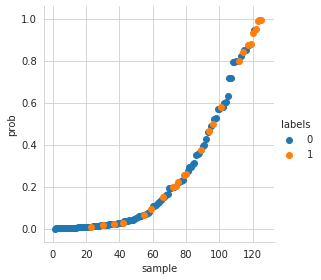

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
sns.FacetGrid(df, hue="labels", size=4) \
   .map(plt.scatter, 'sample', "prob") \
   .add_legend()
plt.show()